# Data Analysis Process

# Data Set & Question

# Load data from CSV Files

Write a function that can be called to import all CSV files needed for the analysis

In [30]:
import unicodecsv

def read_csv(filename):
    with open (filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

Check what the files contains & the format of the different values

In [31]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [32]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [33]:
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

# Fixing Data Types

All the values are currently showing as string, however some of the data should be dates, numbers or boolean conditions that we can use for analysis. Below are 2 functions to easily convert string to dates & string to numbers.

In [35]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

Clean-up the data in the enrollment table

In [36]:
for enrollment in enrollments:
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

Clean-up the data in the daily_engagement table

In [37]:
#in the original data numbers are given with a decimal so converting yhem directly to integer would fail
for engagement in daily_engagement:
    engagement['utc_date'] = parse_date(engagement['utc_date'])
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))

daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

Clean-up the data in the project_submissions table

In [39]:
for submission in project_submissions:
    submission['creation_date'] = parse_date(submission['creation_date'])
    submission['completion_date'] = parse_date(submission['completion_date'])
    
project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur

# Problems in the Data

The account_key is named differently in the daily_engagement table 'acct'. The below rename it to 'account_key'. Note that similar to above this can only be run once in one session or an error will occur given the variable name will have already been changed.

In [51]:
for engagement in daily_engagement:
    #create a new key 'account_key' with identical value as 'acct' for each rows
    engagement['account_key'] = engagement['acct']
    #delete 'acct' key & value pair from the dictionary
    del engagement['acct']
daily_engagement[0]

#OUTPUT BEFORE USING DEL
#daily_engagement[0]
#OrderedDict([('acct', '0'),
#             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
#             ('num_courses_visited', 1),
#             ('total_minutes_visited', 11.6793745),
#             ('lessons_completed', 0),
#             ('projects_completed', 0),
#             ('account_key', '0')])

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

# Investigating the Data

Total numbers of row in each table

In [54]:
def records_count(file_name, my_file):
    print('Total records in {}: {}'.format(file_name, len(my_file)))

records_count('enrollments', enrollments)
records_count('daily_engagement', daily_engagement)
records_count('project_submissions', project_submissions)


Total records in enrollments: 1640
Total records in daily_engagement: 136240
Total records in project_submissions: 3642


Unique numbers of students (account_key) in each table

In [55]:
def unique_student(file_name, my_file):
    unique_students = set()
    for record in my_file:
        unique_students.add(record['account_key'])
    print('Unique students in {}: {}'.format(file_name, len(unique_students)))

unique_student('enrollments', enrollments)
unique_student('daily_engagement', daily_engagement)
unique_student('project_submissions', project_submissions)

Unique students in enrollments: 1302
Unique students in daily_engagement: 1237
Unique students in project_submissions: 743


# Missing Engagement Records

When we compare the unique numbers of students in the enrollment and daily_engagement table above we can see that 65 students are missing from the daily_engagement table

In [56]:
1302-1237

65

First, let's look at one of the record for a student present in enrollment but not in engagement table to see if there is anything particular about that record that could explain why it doesn't appear in the daily_engagement table.

In [62]:
#create a list of unique student accts in daily_engagement
unique_de_students = set()
for record in daily_engagement:
    unique_de_students.add(record['account_key'])
    
#for each students in the enrollment file, 
#if the student acct is no in the list of daily_engagement acct
#print the first record & exit the loop
for student in enrollments:
    if student['account_key'] not in unique_de_students:
        print(enrollment)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


We can see above that this student joined & canceled the same day and 'days_to_cancel' is 0. It makes sense that if a student was enrolled for less than a day then no record was retained in the daily_engagement table. Now let's check if there are any other missing engagement records that do not fit this profile.

In [74]:
other_missing_records = 0
for student in enrollments:
    #dont't forget the parentheses around the 2 conditions
    if (student['account_key'] not in unique_de_students and student['days_to_cancel'] != 0):
        other_missing_records +=1
        print(student)
        
other_missing_records

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


3

The 3 additional records with no engagement data all have 'is_udacity' = True. Here this means that they are test accts.

# Tracking down the remaining problems

We don't want these test accts to be part of our analysis. First let's create a set of account key for all the udacity test accts

In [76]:
udacity_test_accts = set()
for student in enrollments:
    if student['is_udacity']:
        udacity_test_accts.add(student['account_key'])
print(udacity_test_accts)
print(len(udacity_test_accts))

{'1304', '448', '1069', '312', '1101', '818'}
6


Create a function to remove udacity test account  from all tables

In [79]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_test_accts(data):
    non_udacity = []
    for record in data:
        if record['account_key'] not in udacity_test_accts:
            non_udacity.append(record)
    return non_udacity

# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_test_accts(enrollments)
non_udacity_engagement = remove_test_accts(daily_engagement)
non_udacity_submissions = remove_test_accts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


# Refining the Question

QUESTION: how do numbers in the daily engagement table differ for students who pass the first project?

Problem 1 - This will include the data from after the project submission

Problem 2 - This compares data from different length of time

Problem 3 - Includes engagement in course not related to the first project

Problem 3 is not too much of an issue & could be resolved using the complete data engagement file that includes course breakdown, so we won't try to solve it here. However we want to limit the data to before the project submission and we also want to make sure we look at a fix time period as student engagement may differ over time

REVISED QUESTION: Only look at engagement from first week & exclude student that cancel within a week (= during the free trial period)

In [116]:
## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for student in non_udacity_enrollments:
    if(not student['is_canceled'] or student['days_to_cancel'] > 7):
        account_key = student['account_key']
        enrollment_date = student['join_date']
        #save only the most recent enrollment date for students that enrolled multiple times
        if(account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date

#print(paid_students)
print(list(paid_students.keys())[0])
print(list(paid_students.values())[0])
print(list(paid_students.items())[0])
print(len(paid_students))

429
2015-03-10 00:00:00
('429', datetime.datetime(2015, 3, 10, 0, 0))
995


# Getting Data from First Week

Create a function that identify students for which engagement happened during the first week

In [156]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

Create a function that remove students that only remained for the free trial period

In [157]:
def remove_free_trials(data):
    new_data = []
    for student in data:
        if student['account_key'] in paid_students:
            new_data.append(student)
    return new_data

paid_enrollments = remove_free_trials(non_udacity_enrollments)
paid_engagement = remove_free_trials(non_udacity_engagement)
paid_submissions = remove_free_trials(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


Create a list of all student records from the engagement table who paid for the course and engaged within one week of the join date

In [158]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for record in paid_engagement:
    account_key = record['account_key']
    join_date = paid_students[account_key]
    engagement_date = record['utc_date']
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(record)

print(len(paid_engagement_in_first_week))
paid_engagement_in_first_week[0]

6919


OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

# Exploring Student Engagement

To study student engagement using our data set I want to be able to see the total engagement for each student. To do that we can create a function that will create a dictionary in which multiple records are grouped under a specific key.

In [159]:
#when the values in a dictionary are collections (lists, dicts, etc.) 
#the value (an empty list or dict) must be initialized the first time 
#a given key is used. While this is relatively easy to do manually, 
#the defaultdict type automates and simplifies these kinds of operations.

from collections import defaultdict

# Create a function that group records under a specific key

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for record in data:
        key = record[key_name]
        grouped_data[key].append(record)
    return grouped_data

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
list(engagement_by_account.items())[0]

('0',
 [OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
               ('num_courses_visited', 1),
               ('total_minutes_visited', 11.6793745),
               ('lessons_completed', 0),
               ('projects_completed', 0),
               ('account_key', '0')]),
  OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
               ('num_courses_visited', 2),
               ('total_minutes_visited', 37.2848873333),
               ('lessons_completed', 0),
               ('projects_completed', 0),
               ('account_key', '0')]),
  OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)),
               ('num_courses_visited', 2),
               ('total_minutes_visited', 53.6337463333),
               ('lessons_completed', 0),
               ('projects_completed', 0),
               ('account_key', '0')]),
  OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)),
               ('num_courses_visited', 1),
               ('tota

Next we want to know the total_minutes_visited for each students as well as for the entire population. To do that we can first define a function that will create a dictionay of keys with total values attached to it for the specific metric.

In [160]:
# Define a function that can be used to sum grouped items for different variables

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, records in grouped_data.items():
        total = 0
        for record in records:
            total += record[field_name]
        summed_data[key] = total
    return summed_data
        
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

print(list(total_minutes_by_account.items())[0])

('0', 494.88049616599994)


Next we can create a function that will provide summary statistics for a specific variable

In [226]:
import numpy as np

def describe_data(data, name):
    print('Summary Statistics for {}: '.format(name))
    print('Mean is: ', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))

describe_data(list(total_minutes_by_account.values()),'total_minutes_visited')

Summary Statistics for total_minutes_visited: 
Mean is:  306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


# Debugging Data Analysis Code

When we first run the result above we can see the maximum is 10568 minutes which is more minutes that there is in 7 days suggesting there is something wrong with the code.

To understand what may be happening here let's identify student with the maximum engagement to check what may driving the issue

In [162]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in list(total_minutes_by_account.items()):
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print(student_with_max_minutes, max_minutes)

#Output prior to debugging
#108 10568.100867332541

163 3564.7332644989997


In [169]:
#Alternative way to obtain the data
max(total_minutes_by_account.items(), key=lambda pair: pair[1])

('163', 3564.7332644989997)

Next let's print the engagement records associated with this student

In [163]:
for record in paid_engagement_in_first_week:
    if record['account_key'] == student_with_max_minutes:
        print(record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

From the data above (prior to debugging it appeared more than 7 days of records were included. Let's pull specifically the engagement data to better visualize the information

In [168]:
for record in paid_engagement_in_first_week:
    if record['account_key'] == '108':
        print(record['utc_date'])

2015-04-20 00:00:00
2015-04-21 00:00:00
2015-04-22 00:00:00
2015-04-23 00:00:00
2015-04-24 00:00:00
2015-04-25 00:00:00
2015-04-26 00:00:00


Why are so many records included? Let's look at this student join_date in the enrollment table..

In [166]:
for record in paid_enrollments:
    if record['account_key'] == '108':
        print(record['join_date'])

2015-01-07 00:00:00
2015-04-20 00:00:00


This student has 2 join date. Only 7 records where included after the 2nd date but all records prior to this date were also included. This suggest there is something wrong with our within_one_week function:

# Lessons Completed in First Week

To obtain the summary statistics for lessons_completed we can just call again the function we defined earlier.

In [170]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(list(lessons_completed_by_account.values()),'lessons_completed')

Summary Statistics for lessons_completed: 
Mean is:  1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


# Number of Visits in First Week

To calculate the number of visit in first week we can reuse the code from our sum group function but adding a condition. Note: If the student did not visit one a day, then there will still be a record for that day but num_courses_visited = 0

In [190]:
def summed_visits_in_first_week(data):
    total_by_student = {}
    for student, student_engagement in data.items():
        total = 0
        for record in student_engagement:
            if record['num_courses_visited'] > 0:
                total += 1
            total_by_student[student] = total
    return total_by_student

summed_visits_in_first_week(engagement_by_account)

list(total_by_student.items())[:7]

[('0', 7), ('1', 2), ('2', 0), ('3', 0), ('4', 1), ('5', 5), ('6', 6)]

We can then call again the describe_data function to obtain the summary statistics

In [174]:
describe_data(list(total_by_student.values()),'num_courses_visited')

Summary Statistics for num_courses_visited: 
Mean is:  2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


# Splitting out Passing Students

Now that we have the stats for paying students engagement in the first week, it's time to understand the difference in engagement between the students that passed the subway project and these who didn't

In [184]:
# first let's create a lits of the unique account key for students who passed the subway project

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()
for submission in paid_submissions:
    account_key = submission['account_key']
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    passing_grade = ['PASSED', 'DISTINCTION']
    if (project in subway_project_lesson_keys and rating in passing_grade):
        pass_subway_project.add(account_key)

print(list(pass_subway_project)[0:5])
print(len(pass_subway_project))

['248', '283', '326', '93', '334']
647


In [186]:
# create 2 list of engagement records separating the student who passed the projects from the one who didn't

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))
print(len(passing_engagement)+len(non_passing_engagement))
print(len(paid_engagement_in_first_week))

4527
2392
6919
6919


# Comparing the 2 Students Group

STEP 1 - Group engagement data by student for passing & non-passing students

In [252]:
# Create a dictionary of engagement grouped by student for passing_students & non_passing_students
# The keys are account keys, and the values are lists of engagement records.

passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')
#list(passing_engagement_by_account.items())[0]

STEP 2 - Obtain summarised data by student for specific metrics

In [213]:
# obtain sum of each chosen metric by student for students in the two groups 
# using the sum_grouped_items function defined earlier

passing_students_total_minutes_by_account = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
non_passing_students_total_minutes_by_account = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
passing_student_lessons_completed_by_account = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
non_passing_student_lessons_completed_by_account = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
passing_students_visits_in_first_week = summed_visits_in_first_week(passing_engagement_by_account)
non_passing_students_visits_in_first_week = summed_visits_in_first_week(non_passing_engagement_by_account)
passing_student_num_courses_visited_by_account = sum_grouped_items(passing_engagement_by_account, 'num_courses_visited')
non_passing_student_num_courses_visited_by_account = sum_grouped_items(non_passing_engagement_by_account, 'num_courses_visited')

print(list(passing_students_total_minutes_by_account.items())[0])
#print(list(non_passing_students_total_minutes_by_account.items())[0])
#print(list(passing_student_lessons_completed_by_account.items())[0])
#print(list(non_passing_student_lessons_completed_by_account.items())[0])
#print(list(passing_students_visits_in_first_week.items())[:7])
#print(list(non_passing_students_visits_in_first_week.items())[:7])

('0', 494.88049616599994)


STEP 3 - Obtain summary statistics & visualisations for each metric (only relevant results kept in this notebook)

In [313]:
%matplotlib inline # enable to see plots in the notebook instead of a separate window
import matplotlib.pyplot as plt
import seaborn as sns # make the plots look nicer

Summary Statistics for passing students: 
Mean is:  394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
Summary Statistics for passing students: 
Mean is:  143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


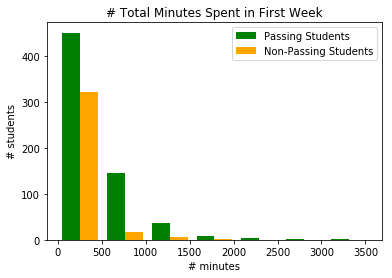

In [314]:
# data to analyse & visualize
passing_students = list(passing_students_total_minutes_by_account.values())
non_passing_students = list(non_passing_students_total_minutes_by_account.values())

# create summary statistics using the function we've defined earlier
describe_data(passing_students,'passing students')
describe_data(non_passing_students,'passing students')

# create histograms using matplotlib
legend = ['Passing Students', 'Non-Passing Students']
plt.hist([passing_students, non_passing_students], bins = 7, color=['green', 'orange'])
plt.title('# Total Minutes Spent in First Week')
plt.xlabel('# minutes')
plt.ylabel('# students')
plt.legend(legend)
#plt.xticks(range(0, 4000, 500))
#plt.yticks(range(0, 350, 50))
plt.show()

Summary Statistics for passing students: 
Mean is:  3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
Summary Statistics for passing students: 
Mean is:  1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


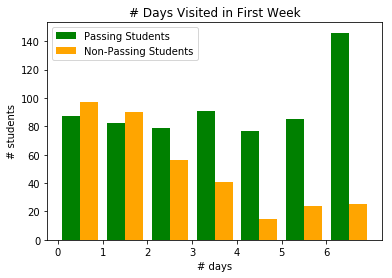

In [315]:
passing_students = list(passing_students_visits_in_first_week.values())
non_passing_students = list(non_passing_students_visits_in_first_week.values())

describe_data(passing_students,'passing students')
describe_data(non_passing_students,'passing students')

legend = ['Passing Students', 'Non-Passing Students']
plt.hist([passing_students, non_passing_students], bins = 7, color=['green', 'orange'])
plt.title('# Days Visited in First Week')
plt.xlabel('# days')
plt.ylabel('# students')
plt.legend(legend)
plt.xticks(range(0, 7, 1))
plt.yticks(range(0, 160, 20))
plt.show()

In [319]:
# note that it is possible to add a plot along with the summary statistics 
# by adding it to the function we defined earlier
def describe_data_hist(data, legend, title, x, y):
    print('Summary Statistics for {}: '.format(legend))
    print('Mean is: ', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    plt.hist(data, bins = 20)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

TOTAL MINUTES VISITED
Summary Statistics for passing students: 
Mean is:  394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
Summary Statistics for non passing students: 
Mean is:  143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


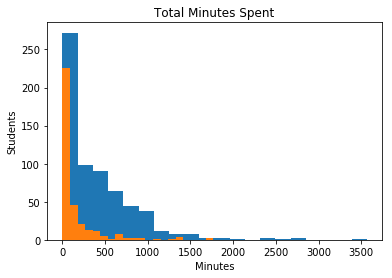

In [320]:
passing_students = list(passing_students_total_minutes_by_account.values())
non_passing_students = list(non_passing_students_total_minutes_by_account.values())

print('''TOTAL MINUTES VISITED''')
describe_data_hist(passing_students,'passing students', 'Total Minutes Spent', 'Minutes', 'Students')
describe_data_hist(non_passing_students,'non passing students', 'Total Minutes Spent', 'Minutes', 'Students')